In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mnist_test.csv')

In [3]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sr = df.sample(500)

In [5]:
x = sr.iloc[: ,1:]
y = sr.iloc[: ,0]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain , xtest ,ytrain ,ytest = train_test_split(x ,y ,test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [18]:
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps) 

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}

In [22]:
grid =GridSearchCV(pipeline ,param_grid=parameters ,cv =5)

In [23]:
grid.fit(xtrain ,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(kernel='poly'))]),
             param_grid={'SVM__C': [0.001, 0.1, 100, 1000000.0],
                         'SVM__gamma': [10, 1, 0.1, 0.01]})

In [25]:
grid.score(xtest, ytest)

0.79

In [26]:
y_pred = grid.predict(xtest)

In [28]:
import matplotlib.pyplot as plt

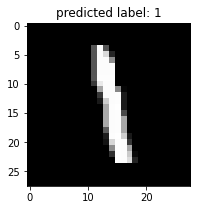

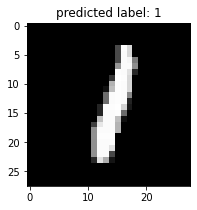

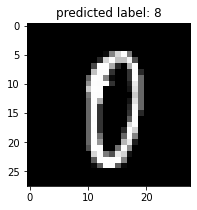

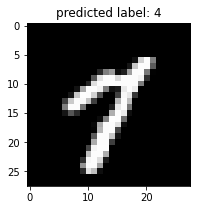

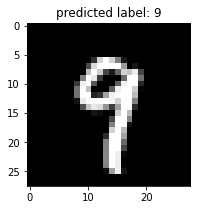

In [30]:
for i in range(5):
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    first_image = np.array(xtest, dtype='float')
    q = first_image[i]
    plt.title('predicted label: {0}'. format(y_pred[i]))
    pixels = q.reshape((28, 28))
    plt.imshow(pixels,interpolation='nearest', cmap='gray')
    plt.show()